# Downloading Dataset from google drive

In [ ]:
import gdown
import cv2
import matplotlib
import numpy
import os
# Downloading the dataset from the shared Google drive.
dataset_link = 'https://drive.google.com/drive/folders/1TuM4CgGI3WBqOHNFjuzjaEzLOH5Yw43_?usp=drive_link'
gdown.download_folder(dataset_link, quiet=True, use_cookies=False)

# Visualizing random Images

In [10]:
import gdown
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import os
import random

random_screw_and_bolt_image = random.choice(os.listdir(r'D:\projects\CountingChallenge\Satyaki\NON AI\CountingChallenge\ScrewAndBolt_20240713'))
image_path = os.path.join('CountingChallenge','ScrewAndBolt_20240713', random_screw_and_bolt_image)
image_path = image_path.replace('\\','/')
img = cv2.imread(image_path)
img = cv2.resize(img, (500,500))
cv2.imshow('kk',img)
cv2.waitKey(0)

-1

# Counting the number of items in 4 randomly selected images


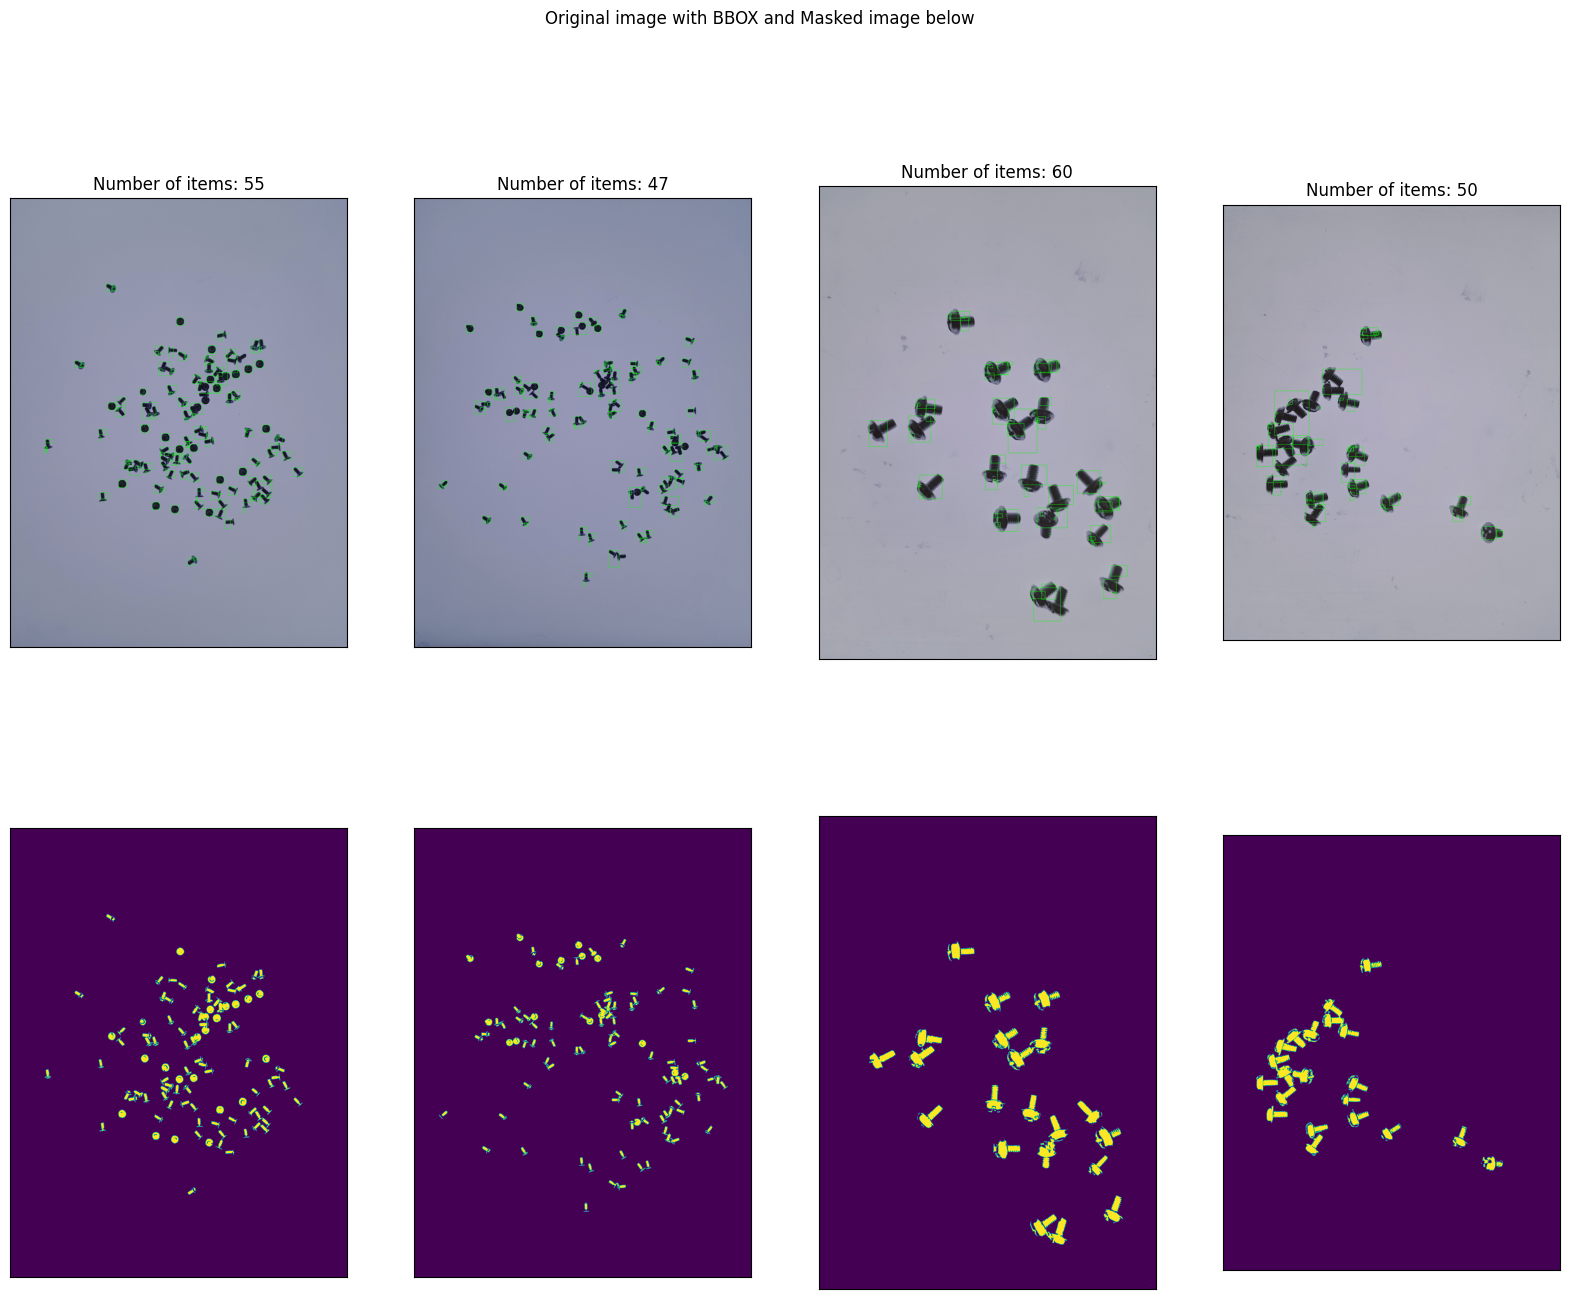

In [2]:

fig, ax = plt.subplots(nrows=2, ncols=4,figsize = (20,15))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
random_screw_and_bolt_images = random.sample(os.listdir(r'D:\projects\CountingChallenge\Satyaki\NON AI\CountingChallenge\ScrewAndBolt_20240713'), 4)
for index,image in enumerate(random_screw_and_bolt_images):

    image_path = os.path.join('CountingChallenge','ScrewAndBolt_20240713', image)
    image_path = image_path.replace('\\','/')
    img = cv2.imread(image_path)
    # img = cv2.resize(img, (500,500))
    mask = cv2.inRange(img,(0,0,0),(64,64,64))
    rects = []
    conts, hier = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(conts)):

        rect = cv2.boundingRect(conts[i])
        rects.append(rect)
        x,y,w,h = rect
        cv2.rectangle(img,(x,y),(x+h,y+w), (0,255,0), 2) 
    ax[0,index].set_title(f'Number of items: {len(conts)//4}')  
    ax[0,index].imshow(img)
    ax[1,index].imshow(mask)
    fig.suptitle('Original image with BBOX and Masked image below')
    cv2.waitKey(0)